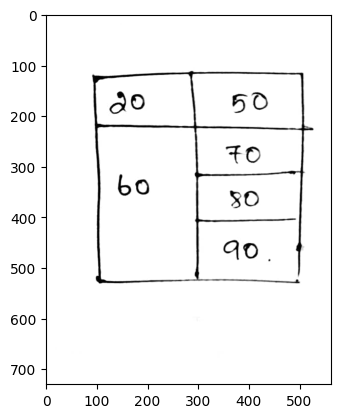

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_for_box_extraction_path = r"images/sample/1.jpg"  
cropped_dir_path = r"images/sample/table/" 

img = cv2.imread(img_for_box_extraction_path, 0)
if img is not None:
    
    plt.imshow(img, cmap='gray')
    (thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    if img_bin is not None:
       
        img_bin = 255 - img_bin
        cv2.imwrite(cropped_dir_path+"inverted_image.jpg", img_bin)

        
        kernel_length = np.array(img).shape[1] // 270
        
        
        verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
        
        hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
        
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

        
        img_temp1 = cv2.erode(img_bin, verticle_kernel)
        verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
        cv2.imwrite(cropped_dir_path+"verticle_lines.jpg", verticle_lines_img)

        
        img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
        horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
        cv2.imwrite(cropped_dir_path+"horizontal_lines.jpg", horizontal_lines_img)

   
        alpha = 0.5
        beta = 1.0 - alpha

        
        img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
        img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
        (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        cv2.imwrite(cropped_dir_path+"img_final_bin.jpg", img_final_bin)


        contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    

Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
195 87
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
204 84
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed
212 102
Threshholding operation failed
Threshholding operation failed
Threshholding operation failed


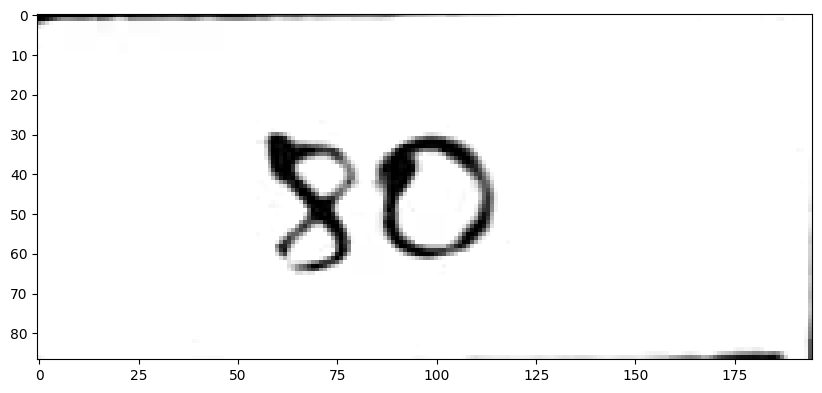

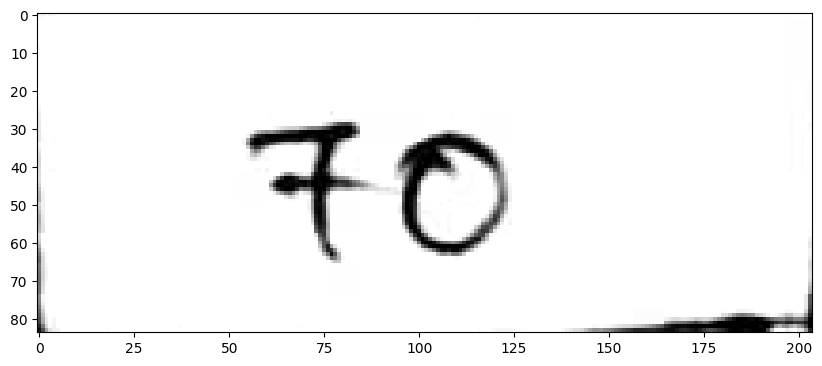

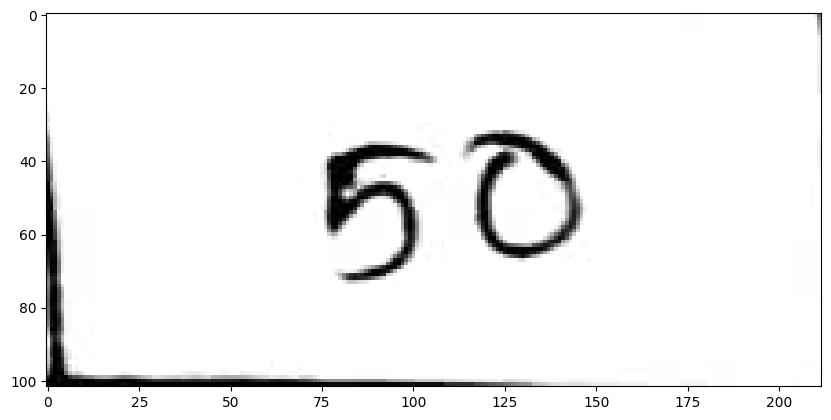

In [13]:
idx = 0
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    #if (w > 90 and h > 80 and w < 300 and h < 500):
    if( 530 > x >250 and y < 1000 and w > 100 ):
        print(w , h)
        idx += 1
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite("images/sample/digit/"+ str(idx) + '.jpg', new_img)
        
        plt.figure(figsize=(10, 5))
        #plt.subplot(2,5, idx)
        plt.imshow(new_img, cmap='gray')
        #cv2.imshow("Current Crop", new_img)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()

    else:
        print("Threshholding operation failed")
        